# Lab 3 : Bivariate analysis with categorial data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

## Part A : Questions on the course

#### Question 1 : Explain what a categorial variable is.

By opposition to a quantitative variable, a categorical variable represents categories and can take a limited number of "text" values.

#### Question 2 : Why can't bivariate analysis indexes such as covariance or correlation be used on categorial variables ?

You can't use bivariate analysis indexes such as covariance or correlation with categorical variables because they are computed from numbers. Categorical variables are by definition "not numbers" : they represent categories, classes, labels, etc. 

#### Question 3 : Remind what a hypothesis test is. In particular, you will discuss the null hypothesis, the alternate hypothesis, and the p-value.

A hypothesis test is a statistical tool used to assess whether or not an hypothesis is likely: It tests a null Hypothesis $H_0$ which is assumed to be true, against an alternate hypothesis $H_1$. Both hypothesis are asymetrical, and it is more of a problem to wrongly reject $H_0$.
Hypothesis tests uses a desired level of "acceptable error" $\alpha$ to reject or not the null hypothesis. The p-value computed by the test is compared with the chosen $\alpha$ to decide whether or not the null hypothesis is rejected :
- If p-value $< \alpha$, we reject $H_0$
- If p-value $\geq \alpha$, we can't reject $H_0$


#### Question 4 :  Explain the hypothesis tested by the $\chi^2$ test and how to interpret the results.

It is a statistical test of independence for categorical variables:
- $H_0$ the two variables are independent
- $H_1$ they are not independent

## Part B : Chi-squared test of independence and categorial variables - Social background and higher education

In this exercise, you will study the result of a survey conducted on 2440 students to see if there is a link between the social background of their parents and the type of studies they follow.

Below is a list of translations that you might need :
- IUT/BTS : Technical studies in 2 years after highschool
- Écoles d'ingénieurs : 5 years of enginering studies through the 'Grandes Écoles' track program.
- Univ\_Science : Any science program at the university (Bachelor's, Master's or PhD)
- Univ\_Socio : Any social science program at the university (Bachelor's, Master's or PhD)
- Médecine : A 7 to 9 years program to become a medical doctor
- Ouvriers : Worker class
- Employés : Mid level employees and clercs
- Cadre : High level employees and managerial staff
- Libéraux (Profession Liberales) : Liberal Professions, high-end independant workers (lawyers, doctors, architects, surgeons, etc.)


#### Question 1 : Open the stats_socio.csv file and describe its content using histograms:
- Display 2 histograms for the different categories and their repartition in the different sub-categories.
- Plot the 2 cross-category histograms.

Comment your results

In [24]:
df_stats = pd.read_csv("Data/stats_socio.csv",sep=",")    
print(df_stats.head())

           Etudes              Parents  Cout_total
0  Ecole_Commerce               Cadres       37960
1  Ecole_Commerce  Profession_Liberale       54000
2  Ecole_Commerce  Profession_Liberale       64000
3  Ecole_Commerce  Profession_Liberale       56000
4  Ecole_Commerce  Profession_Liberale       64000


In [25]:
studies = df_stats['Etudes'].value_counts()
parent_cat = df_stats['Parents'].value_counts()

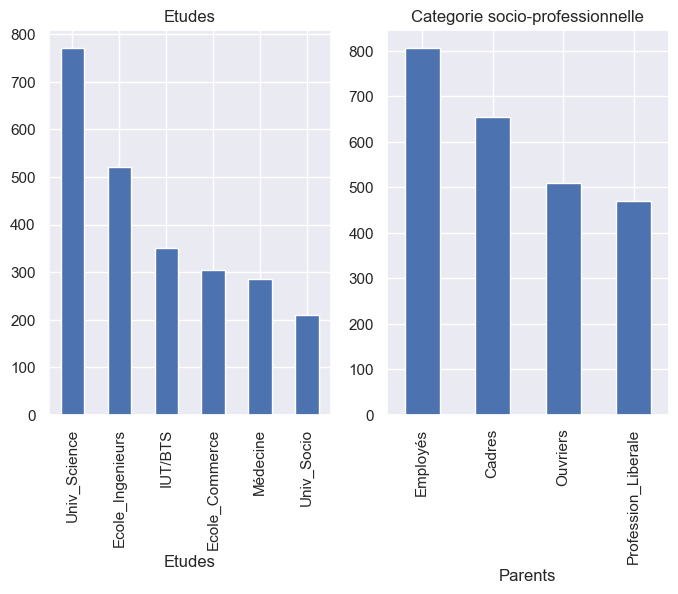

In [26]:
fig,axes = plt.subplots(1,2,figsize=(8,5))
studies.plot(kind='bar',ax=axes[0],title="Etudes")
parent_cat.plot(kind='bar',ax=axes[1],title="Categorie socio-professionnelle")
plt.show()

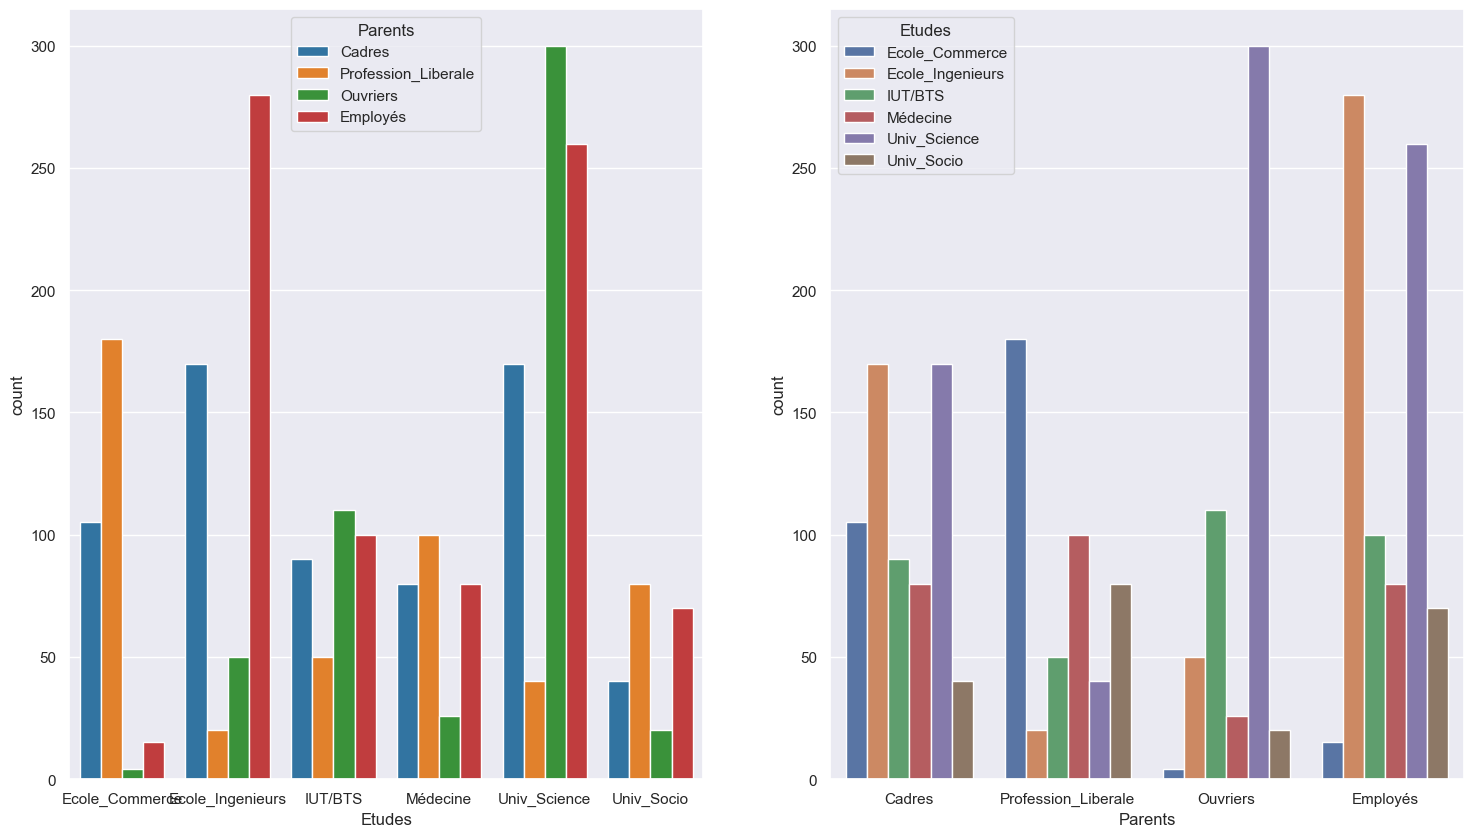

In [27]:
fig,axes = plt.subplots(1,2,figsize=(18,10))
# Plotting the occurence of each values depending on other attributes
sns.countplot(x="Etudes",data=df_stats,hue='Parents',palette="tab10",ax=axes[0]) 
sns.countplot(x="Parents",data=df_stats,hue='Etudes',palette="deep",ax=axes[1]) 
plt.show()

<u>Answer 1 : </u>

We see that the parents' job appears to have a strong influence as all categories are far from having a balanced repartition. For instance : 
- We see very few students whose parents are workers or mid class employees in trade schools
- We see that the vast majority of worker's children follow university and technical degrees.

#### Question 2 : Create a cross-table (contingency table) with the effectives of all cross-classes. Display and comment on the repartition of the variables in the resulting table. How many degrees of freedom do we have in this problem ?

In [28]:
crosstab = pd.crosstab(df_stats['Etudes'],df_stats['Parents'])
print(crosstab.head(6))

Parents           Cadres  Employés  Ouvriers  Profession_Liberale
Etudes                                                           
Ecole_Commerce       105        15         4                  180
Ecole_Ingenieurs     170       280        50                   20
IUT/BTS               90       100       110                   50
Médecine              80        80        26                  100
Univ_Science         170       260       300                   40
Univ_Socio            40        70        20                   80


In [29]:
def degrees_of_freedom(df):
    return((df.shape[0]-1)*(df.shape[1]-1))
    
print("degrees of freedom: ", degrees_of_freedom(crosstab))

degrees of freedom:  15


<u>Answer 2 :</u>

The cross table confirms the uneven repartition. We have 15 degrees of freedom : $(4-1) \times (6-1)= 3 \times 5 = 15$.

#### Question 3 : Use the command chi2_contingency($\cdot$) from the scipy.stats library on your crosstable. From the result and if need be by computed other indexes, what can you conclude on the dependency between these two variables?

In [30]:
chi2, p, dof, ex = chi2_contingency(crosstab)

In [31]:
def cramers(Index1,Index2,df):
    df_result = pd.crosstab(df[Index1],df[Index2])
    chi2, p, dof, ex = chi2_contingency(df_result)
    n = len(df[Index1])
    r=df_result.shape[0]
    c=len(df_result.columns)
    n=0
    for i in range(0,c):
        for j in range(0, r):
            n=n+df_result[df_result.columns[i]][j]
            
    cramer=(chi2/(n*(min((c-1),(r-1)))))**0.5
    return cramer

In [32]:
print("Chi2 value : ",chi2)
print("Pvalue for the link between the parent background and the type of studies: ",p)
print("Cramer's coefficient :", cramers("Parents","Etudes",df_stats))

Chi2 value :  903.5797206663487
Pvalue for the link between the parent background and the type of studies:  6.044918979046687e-183
Cramer's coefficient : 0.3513400810469077


<u>Answer 3 : </u>

The p-value is very small (and way smaller than 0.01) which confirms that we must reject $H_0$ : The type of studies followed by children is therefore <u><b>not independent</b></u> from their parents' job.
However, with a Cramer coefficient at 0.35, we can see that it is difficult to reliably predict one from the other. This is not surprising given the number of possible studies for the children and jobs for the parents.


#### Question 4 : Knowing that the French population counts on average 70 childrens from high end professions (cadres) for 100 children of the worker class, what can you say about the representativity of this study ? If you think it is a good representation, justify. If you think it is not, explain why and try to explain where the biases could come from.

<u>Answer 4 : </u>

We see that we don't have these proportions in this studies. This can be explained by the way the sutdy was conducted: anyone that droped out before starting his/her higher studies was not surveyed and is therefore not counted in this study. This is a bias which obviously will affect lower class children more.

#### Question 5 : We will take a look at the column with the total coast of studies that we had ignored so far. This column contains the cumulated cost of studies over 5 years (or two for BTS and IUT students), and includes tuitions fees as well as housing costs. Add a column "cout_d" to the existing data with the following bins: "0-10", "10-20", "20-30", "30-40", "40-50", "50-60" ou "60+" depending on the cost indicated. Display its histogram.

In [33]:
df_stats['cout_d'] = df_stats.loc[:, 'Cout_total']
df_stats['cout_d']= "0-10"
df_stats.loc[df_stats['Cout_total']>10000,'cout_d']= "10-20"
df_stats.loc[df_stats['Cout_total']>20000,'cout_d']= "20-30"
df_stats.loc[df_stats['Cout_total']>30000,'cout_d']= "30-40"
df_stats.loc[df_stats['Cout_total']>40000,'cout_d']= "40-50"
df_stats.loc[df_stats['Cout_total']>50000,'cout_d']= "50-60"
df_stats.loc[df_stats['Cout_total']>60000,'cout_d']= "60+"

<Axes: title={'center': 'Cost of studies'}, xlabel='cout_d'>

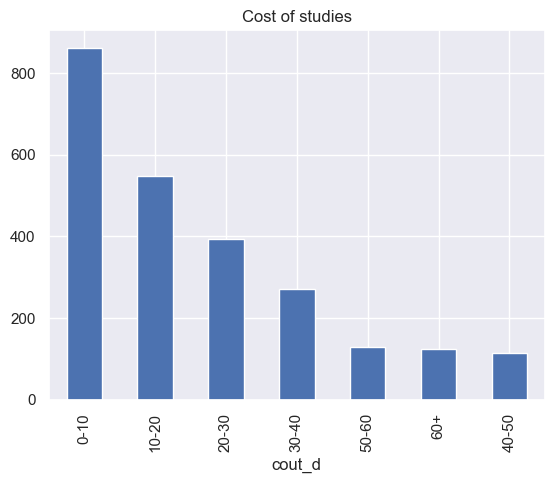

In [34]:
df_stats['cout_d'].value_counts().plot(kind='bar',title="Cost of studies")

As you can see, beside n approximate distribution of the distribution for the cost of studies, the previous histogram is not very informative.

#### Question 6 : Display the 2 histograms crossing the parent jobs and cost of studies in both directions. Comment.

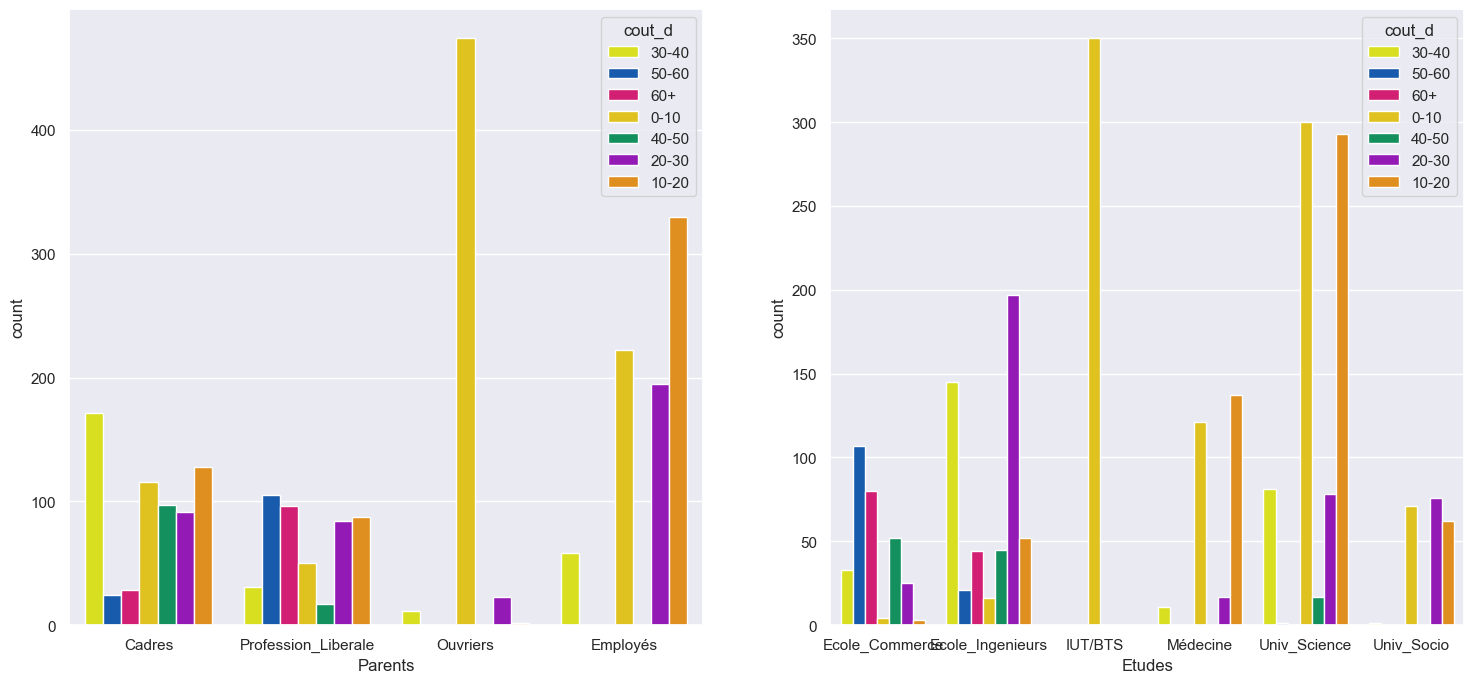

In [35]:
fig,axes = plt.subplots(1,2,figsize=(18,8))
sns.countplot(x="Parents",data=df_stats,hue='cout_d',palette="prism",ax=axes[0]) 
sns.countplot(x="Etudes",data=df_stats,hue='cout_d',palette="prism",ax=axes[1]) 
fig.show()


<u>Answer 6 : </u>

We have very different prices depending of the type of studies, and also different prices depending on the parents's job.

#### Question 7 : Using the statistical tools at your disposal A partir des outils statistiques à votre disposition, assess the eventual link between the cost of studies and the parent job. You will specify which parent professions (if any) are skewing the statistics, and how.

In [36]:
tab_croise2 = pd.crosstab(df_stats['cout_d'],df_stats['Parents'])
print(tab_croise2.head(7))

Parents  Cadres  Employés  Ouvriers  Profession_Liberale
cout_d                                                  
0-10        116       222       474                   50
10-20       128       330         2                   87
20-30        91       195        23                   84
30-40       171        58        11                   31
40-50        97         0         0                   17
50-60        24         0         0                  105
60+          28         0         0                   96


In [37]:
chi2, p, dof, ex = chi2_contingency(tab_croise2)
print([chi2, p, dof, ex])

[1962.2813137339608, 0.0, 18, array([[231.39754098, 284.38934426, 180.17213115, 166.04098361],
       [146.83811475, 180.46516393, 114.33196721, 105.3647541 ],
       [105.49795082, 129.65778689,  82.14344262,  75.70081967],
       [ 72.74795082,  89.40778689,  56.64344262,  52.20081967],
       [ 30.60245902,  37.61065574,  23.82786885,  21.95901639],
       [ 34.62909836,  42.55942623,  26.96311475,  24.84836066],
       [ 33.28688525,  40.90983607,  25.91803279,  23.8852459 ]])]


<Axes: xlabel='Parents', ylabel='cout_d'>

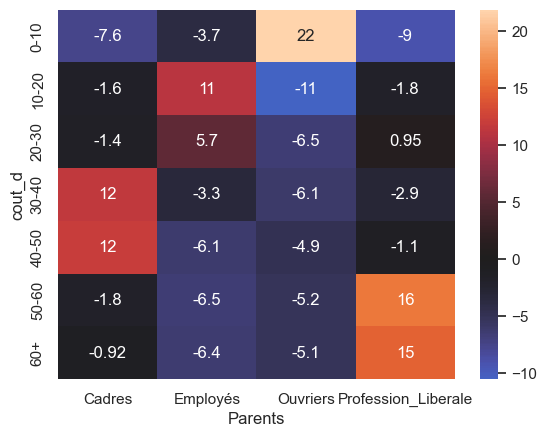

In [38]:
residuals=(tab_croise2-ex)/ex**0.5
sns.heatmap(residuals,annot=True,center=0)

In [39]:
cramer=(chi2/(df_stats.shape[0]*(min((tab_croise2.shape[0]-1),(tab_croise2.shape[1]-1)))))**0.5
print(cramer)

0.5177559441698556


<u>Answer 7 : </u>

From the residual heatmap, we can clearly see which categories are over or under-represented in the different price ranges. Without much surprise, we see that parents with higher earning jobs can pay more expensive studies to their children :
- The worker category is over-represented in the 0-10k€ range
- Higher end professions are over-represented in the 50-60 and 60k€+ ranges

With a Cramer index at 51.78%, we see an even stronger link between the type of parent's job and the price of studies.

#### Question 8 : Same question with the influence of the type of study on the cost.

In [40]:
tab_croise3 = pd.crosstab(df_stats['cout_d'],df_stats['Etudes'])
print(tab_croise3.head(7))

Etudes  Ecole_Commerce  Ecole_Ingenieurs  IUT/BTS  Médecine  Univ_Science  \
cout_d                                                                      
0-10                 4                16      350       121           300   
10-20                3                52        0       137           293   
20-30               25               197        0        17            78   
30-40               33               145        0        11            81   
40-50               52                45        0         0            17   
50-60              107                21        0         0             1   
60+                 80                44        0         0             0   

Etudes  Univ_Socio  
cout_d              
0-10            71  
10-20           62  
20-30           76  
30-40            1  
40-50            0  
50-60            0  
60+              0  


In [41]:
chi2, p, dof, ex = chi2_contingency(tab_croise3)
print([chi2, p, dof, ex])

[2667.8170851560326, 0.0, 30, array([[107.39672131, 183.70491803, 123.64754098, 101.03770492,
        272.02459016,  74.18852459],
       [ 68.15081967, 116.57377049,  78.46311475,  64.11557377,
        172.61885246,  47.07786885],
       [ 48.96393443,  83.75409836,  56.37295082,  46.0647541 ,
        124.0204918 ,  33.82377049],
       [ 33.76393443,  57.75409836,  38.87295082,  31.7647541 ,
         85.5204918 ,  23.32377049],
       [ 14.20327869,  24.29508197,  16.35245902,  13.36229508,
         35.97540984,   9.81147541],
       [ 16.07213115,  27.49180328,  18.50409836,  15.1204918 ,
         40.70901639,  11.10245902],
       [ 15.44918033,  26.42622951,  17.78688525,  14.53442623,
         39.13114754,  10.67213115]])]


<Axes: xlabel='Etudes', ylabel='cout_d'>

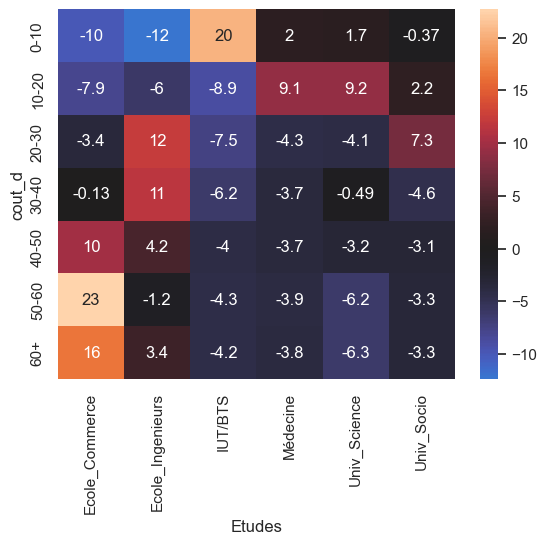

In [42]:
residuals=(tab_croise3-ex)/ex**0.5
sns.heatmap(residuals,annot=True,center=0)

In [43]:
cramer=(chi2/(df_stats.shape[0]*(min((tab_croise3.shape[0]-1),(tab_croise3.shape[1]-1)))))**0.5
print(cramer)

0.46762541801121826


<u>Answer 8 :</u>

We see that different types of studies have very different price ranges. The residual heatmap shows that in particular Trade schools and IUT/BTS significantly diverge from other studies (in the higher and lower price ranges respectively).

#### Question 9 : Using your answers to questions 3, 7 and 8, conclude on which factor(s) have the most influence on the cost of studies.

<u>Answer 9 :</u> 

The 3 computations have shown strong links betwee, the parents jobs and types of studies followed by their children, but also the type of studies and their price, as well as the price of studies and the parent job.
We can therefore conclude that the parent's job is the most influencial factor in the cost of studies.

## Part C : Study on sex habits in the United Kingdom

In this exercice, we are going to use the result of a survey coming from the United-Kingdom and in which 387 people were asked about their sexual orientation. People answering this survey were asked to give their age, the gender they identified as (M/F), and their sexual orientation on the Kinsey scale.

#### Question 1 : Search on the internet what the Kinsey scale is and the meaning of the number 0 to 6, as well as the value "X".

<u>Answer 1: </u> 

This scale ranks sexual orientation from 0 to 6, with 0 being strictly heterosexual, 6 completely homosexual, and "X" meaning asexual.

#### Question 2 ; Open the "kinsey.csv" file and check that your data are correctly formated. Then, propose 3 appropriate visuals to check the balance of participants by age, by gender and based on their sexual orientation. Comment on the balance.

In [44]:
kinsey = pd.read_csv("Data/kinsey.csv",sep="\t");
kinsey.head()

,Age,Sex,Kinsey_Score
0,19,M,0
1,24,M,0
2,21,M,0
3,24,M,0
4,23,M,0


<Axes: xlabel='Age', ylabel='Density'>

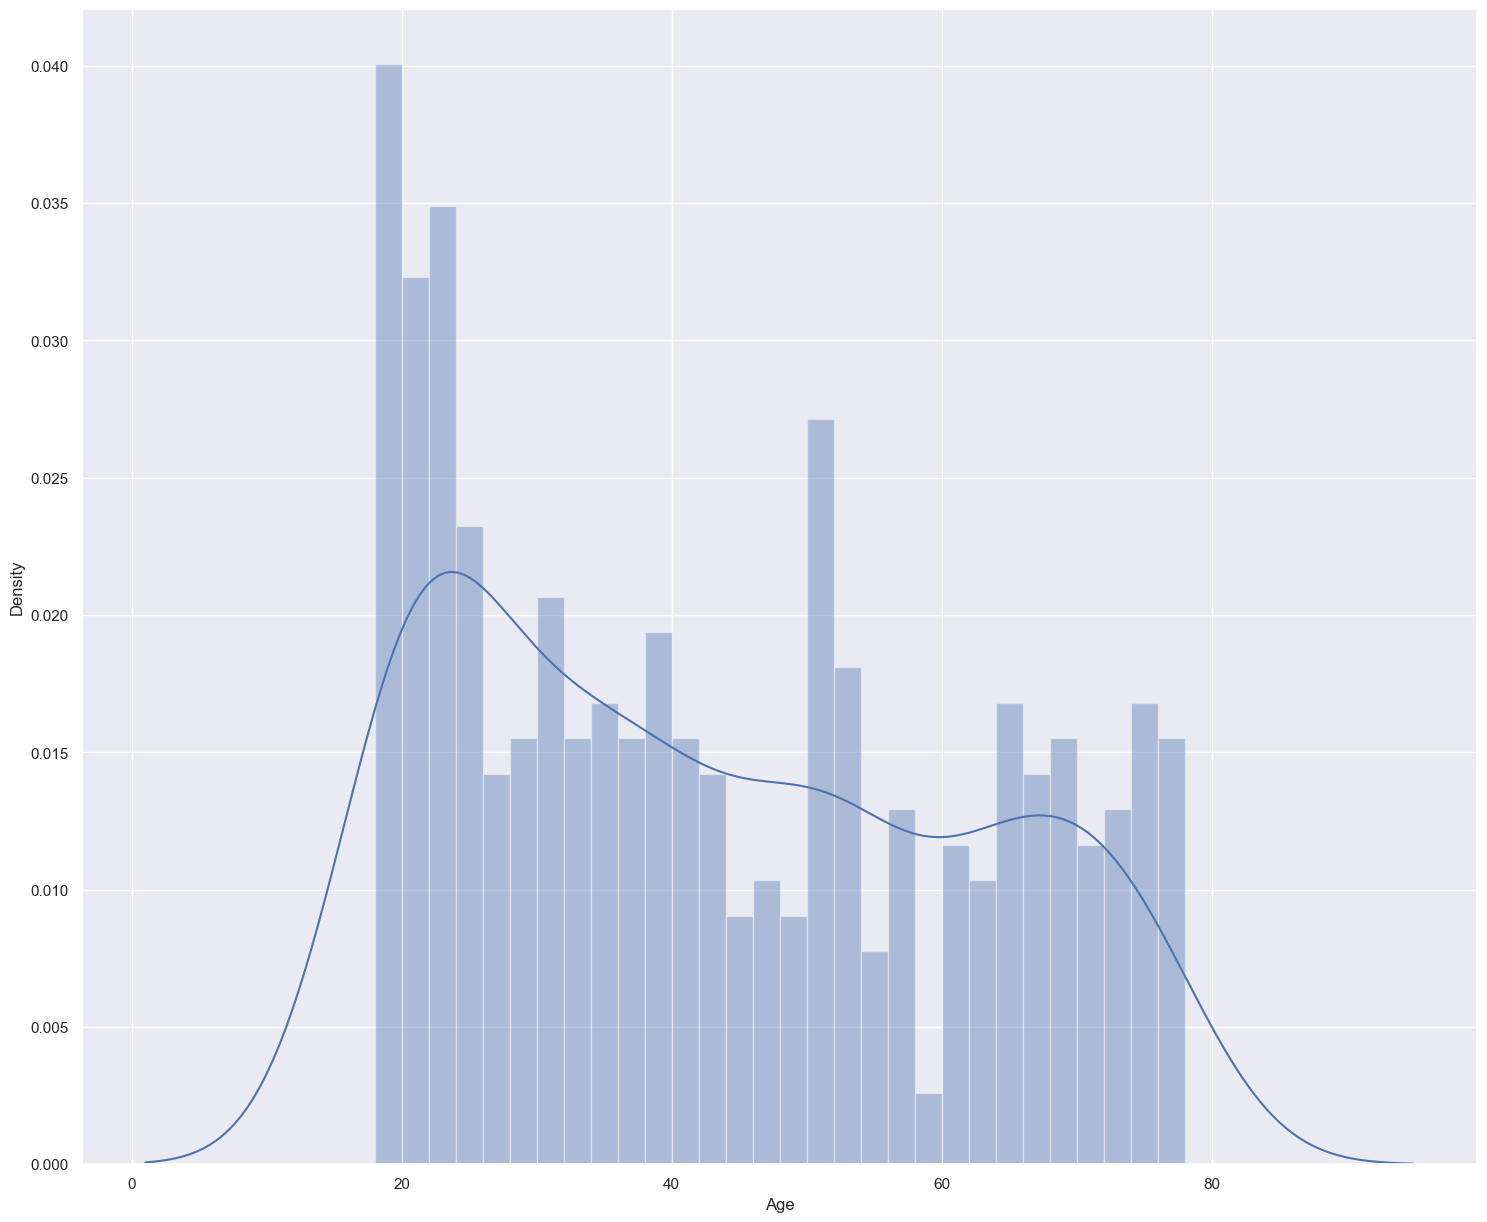

In [45]:
#distribution by age
fig,axes = plt.subplots(1,1,figsize=(18,15))
sns.distplot(kinsey['Age'],bins=30)

<Axes: ylabel='count'>

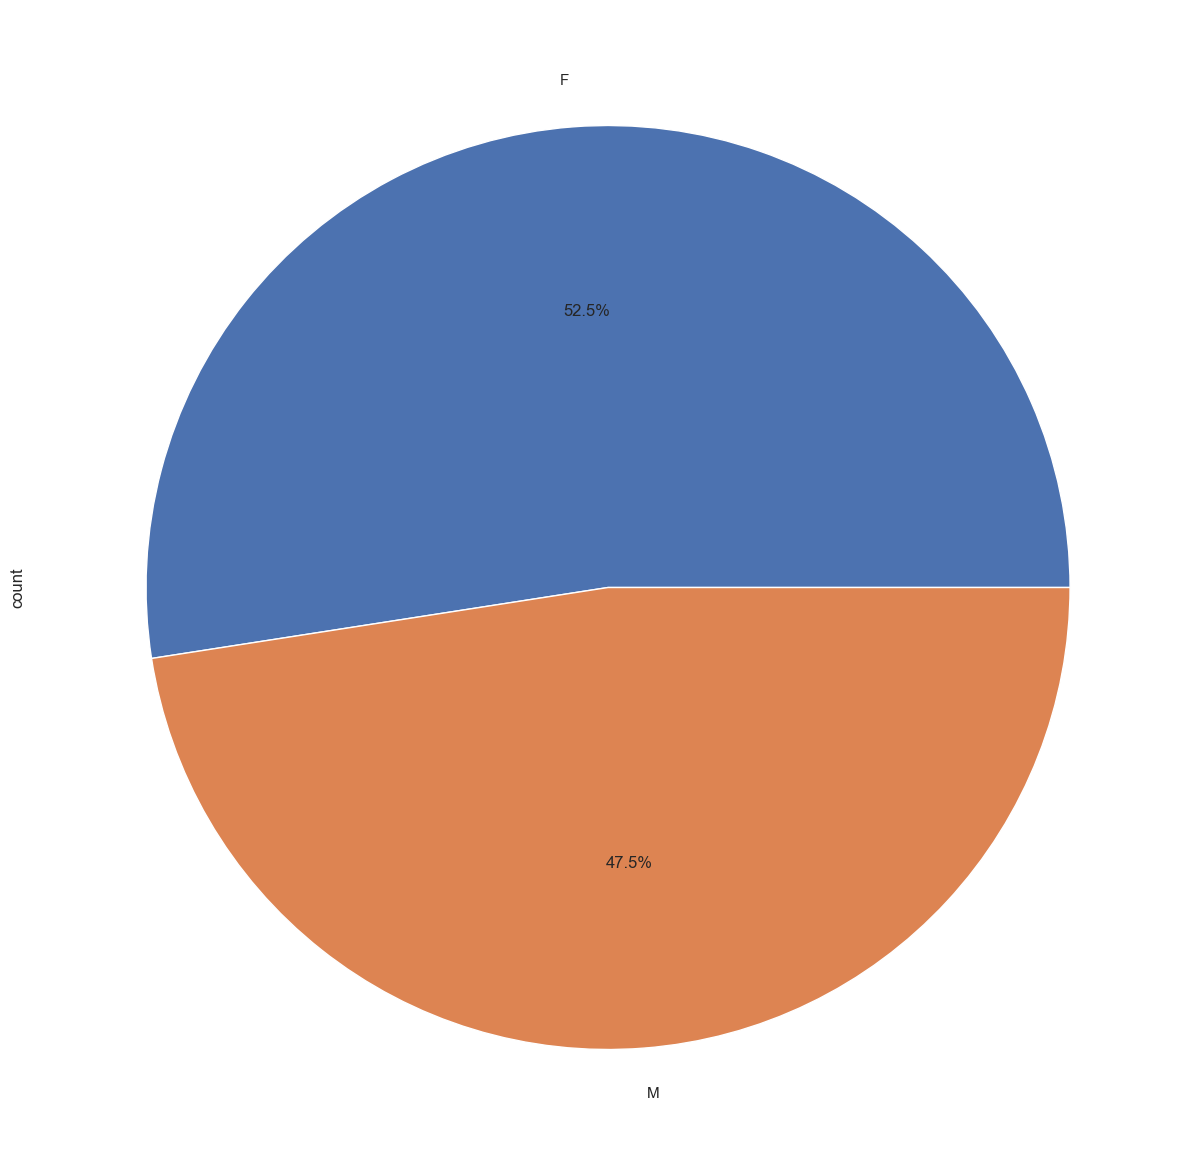

In [46]:
#repartition by gender
fig,axes = plt.subplots(1,1,figsize=(18,15))
kinsey["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

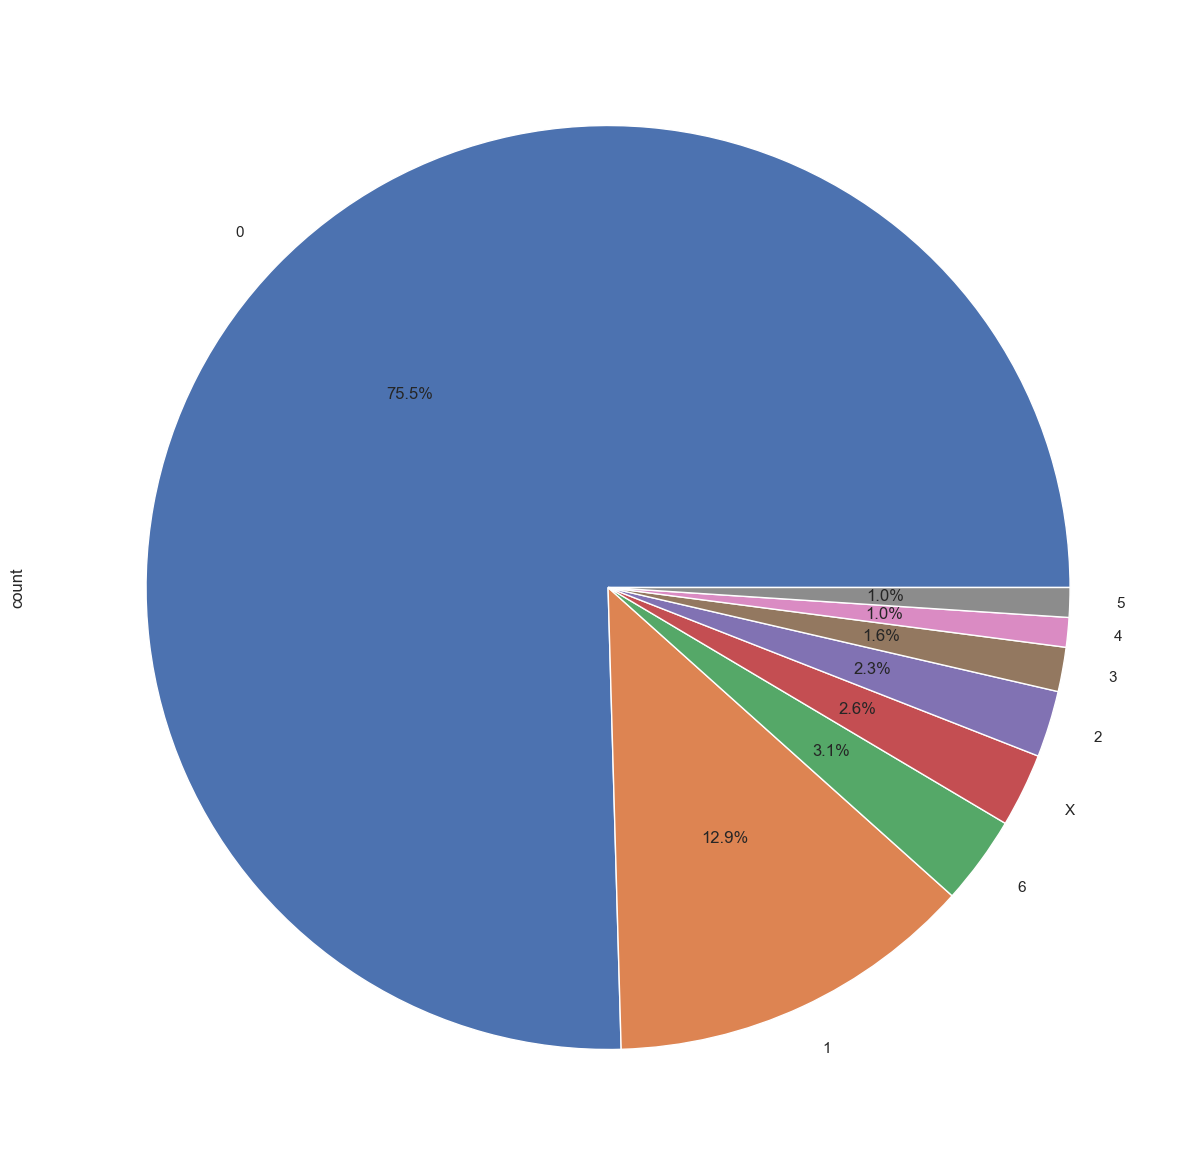

In [47]:
#repartition by orientation
fig,axes = plt.subplots(1,1,figsize=(18,15))
kinsey["Kinsey_Score"].value_counts().plot(kind='pie', autopct='%1.1f%%')

<u>Answer 2 : </u>

The F/M balance seems good enough (close to 50/50). Younger people appear to be slightly over-represented in the age balance.

The British survey had a particular focus on the evolution and changes in sexual habits by age range. In particular, it compared the answers of ages 18-25, 26-39, 40-59 and 60+ years old people. Its conclusion is that the percentage of people identifying as "non-strictly heterosexual" is significantly higher in the 18-25 age range than in other ranges.

#### Question 3 : Using 2 different strategies (and inspiration from the previous exercises and labs), confirm or reject the results of the study on the claim that 18-25yo have a significantly different percentage of people identifying as "strictly heterosexual" compared with older generations.

In [48]:
#checking the study, first, we must create the cross table :
#here we will consider 18-25 vs the rest

kinsey["tranche"] = kinsey.loc[:, 'Age']
kinsey.loc[ kinsey["Age"]>25 , "tranche" ]="26+"
kinsey.loc[ kinsey["Age"]<26 , "tranche" ]="18-25"

array([<Axes: ylabel='18-25'>, <Axes: ylabel='26+'>], dtype=object)

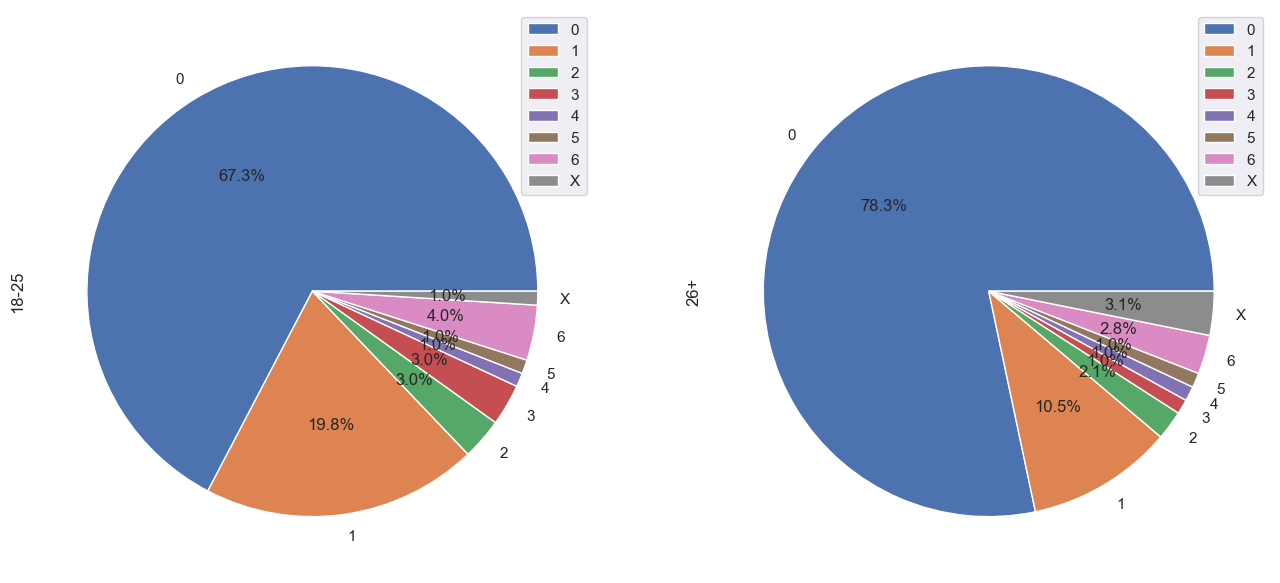

In [49]:
ct = pd.crosstab(kinsey["Kinsey_Score"],kinsey["tranche"])
ct.plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(16, 16))   

In [50]:
#hetero versus non-strictly heteo cross-tab (we remove asexual people)
kin2 = kinsey.drop(kinsey[(kinsey['Kinsey_Score']=="X")].index)
kin2["Orientation"]= kin2.loc[:, 'Kinsey_Score']
kin2.loc[ kin2["Kinsey_Score"]=="0" , "Orientation" ]="strictly hetero"
kin2.loc[ kin2["Kinsey_Score"]!="0" , "Orientation" ]="non-strictly hetero"

array([<Axes: ylabel='18-25'>, <Axes: ylabel='26+'>], dtype=object)

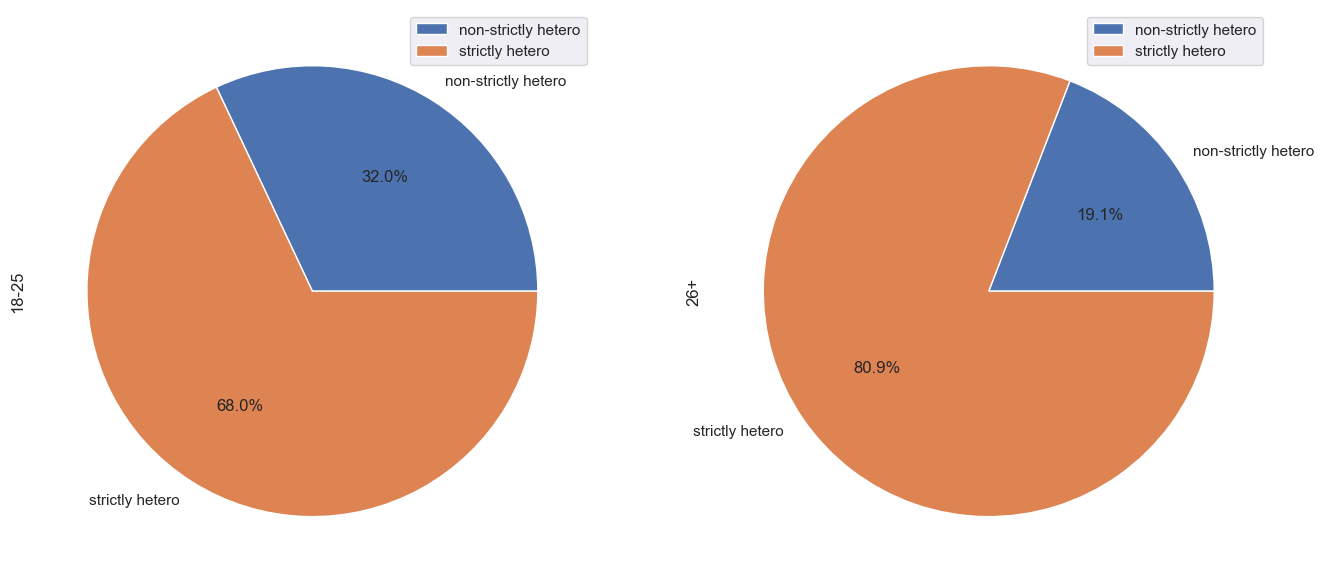

In [51]:
ct2 = pd.crosstab(kin2["Orientation"],kin2["tranche"])
ct2.plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(16, 16))

In [52]:
#method 1 : khi 2
chi2, p, dof, ex = chi2_contingency(ct2)
print([chi2, p, dof, ex])
residus=(ct2-ex)/ex**0.5
print(residus)
cramer=(chi2/(df_stats.shape[0]*(min((ct2.shape[0]-1),(tab_croise2.shape[1]-1)))))**0.5
print(cramer)

[6.247928179280712, 0.012433865581383905, 1, array([[ 22.5464191,  62.4535809],
       [ 77.4535809, 214.5464191]])]
tranche                 18-25       26+
Orientation                            
non-strictly hetero  1.990937 -1.196238
strictly hetero     -1.074176  0.645410
0.050602631383989294


In [53]:
#method 2 : difference from binomial law
h1825=kin2.loc[ (kin2["Age"]<26) & (kin2["Orientation"]=="strictly hetero") , 'Orientation' ].value_counts()[0]
nh1825=kin2.loc[ (kin2["Age"]<26) & (kin2["Orientation"]!="strictly hetero") , 'Orientation' ].value_counts()[0]
n1825=(h1825+nh1825)

moy_h1825=h1825/n1825

h26p=kin2.loc[ (kin2["Age"]>25) & (kin2["Orientation"]=="strictly hetero") , 'Orientation' ].value_counts()[0]
nh26p=kin2.loc[ (kin2["Age"]>25) & (kin2["Orientation"]!="strictly hetero") , 'Orientation' ].value_counts()[0]
n26p=(h26p+nh26p)

moy_h26p=h26p/n26p

print([moy_h1825 , moy_h26p])

[0.68, 0.8086642599277978]


In [54]:
#normal law hypothesis : confidence intervals
SE1825=np.sqrt(moy_h1825*(1-moy_h1825)/n1825)
SE26p=np.sqrt(moy_h26p*(1-moy_h26p)/n26p)

IC95_inf1825 = moy_h1825 - 1.96 * SE1825
IC95_sup1825 = moy_h1825 + 1.96 * SE1825
IC951825 = [ IC95_inf1825 , IC95_sup1825 ]


IC95_inf26p = moy_h26p - 1.96 * SE26p
IC95_sup26p = moy_h26p + 1.96 * SE26p
IC9526p = [ IC95_inf26p , IC95_sup26p ]

print([IC951825, IC9526p])

[[0.5885706742888257, 0.7714293257111744], [0.762341080303518, 0.8549874395520776]]


The chi square method gets a p-value of 0.012, which implies that we can reject $H_0$ with 95\% confidence, but not with 99\%: We may therefore conclude at a weak dependence link between age and sex habits, meaning a small evolution between the different generations here.

The confidence interval methods reaches a similar conclusion, the two confidence intervals are only slightly overlapping [0.7623,0.7714] for the two age range 18-25 and 26+. We have therefore the same conclusion.